## EDA

---

In [352]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
pd.options.display.max_colwidth = 400

In [353]:
subreddit = pd.read_csv('../datasets/subreddit_combined.csv')
subreddit.head()

,link_flair_text,over_18,selftext,subreddit,title
0,Other,False,So in the venom 2 post credit venom says he recognizes peter Parker even though that venom has never met him because almost the moment venom arrived on earth he has been with Eddie or in a secret facility so could they have met in between movies?,Marvel,plot hole
1,Film/Television,False,"Alright, so I avoided this movie until today, what’s that like 12 years, because if the reviews and I gotta say, it was actually pretty good. Way better than the second Venom, let there be Carnage. \n\nForget other peoples opinions. Watch what you want.",Marvel,"Green lantern, not that bad."
2,Comics,False,"So put together a Team using only D-Listers, let's see what you guys can come up with!\n\nFor me:\n\nBlack Goliath (Bill Foster)\nPatriot (Jeffrey Mace)\nQuake (Daisy Johnson)\nJennifer Kale (the Sorceress from Man-Thing, Dr Strange and Ghost Rider)\nX-51/Machine Man (Aaron Stack)",Marvel,Create a Team using D-List Heroes!
3,Comics,False,"In the comics, Nate Grey has gone out of the way to do what he thinks is best for the world, no matter the cost, and he certainly has the power to do so. It would be interesting to see a storyline where they essentially give him the mindset of Dr. Doom and have him take over the world. Basically the God-Emperor Doom story but with Nate Grey instead.\n\nHowever, where this story diverges is tha...",Marvel,Interesting idea for Nate Grey storyline
4,Film/Television,False,"After watching shows that depicted the realistic consequences of superhumans like The Boys and Invincible there were moments from shows like Ultimate Spiderman and Avengers Assemble that made me genuinely think about how dangerous the character's actions were. Notably in the episode where Spiderman captures Dr. Doom and brings him to the helicarrier, he breaks out and goes on a rampage but the...",Marvel,If Marvel shows were more mature the consequences of character's actions and themes would be a lot more intense.


In [9]:
subreddit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9600 entries, 0 to 14637
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   link_flair_text  9600 non-null   object
 1   over_18          9600 non-null   bool  
 2   selftext         9600 non-null   object
 3   subreddit        9600 non-null   object
 4   title            9600 non-null   object
dtypes: bool(1), object(4)
memory usage: 384.4+ KB


#### Getting the Most Common Words in 'selftext' Per Subreddit

In [233]:
cv1 = CountVectorizer(stop_words='english', strip_accents='ascii', min_df=2)
cv1.fit(subreddit['selftext'])
vect_status = cv1.transform(subreddit['selftext'])
status_df = pd.DataFrame(vect_status.A, columns=cv1.get_feature_names_out())

common_words = status_df.sum().sort_values(ascending=False).head(15)
common_words

harry         5786
like          5086
just          4953
know          3042
think         2996
time          2155
man           2095
really        2027
people        1914
snape         1906
marvel        1826
dumbledore    1803
did           1748
voldemort     1738
amp           1726
dtype: int64

In [234]:
status_df['subreddit'].value_counts()

0    9547
1      50
2       3
Name: subreddit, dtype: int64

##### Not sure what this column is, so going to drop it

In [121]:
status_df.shape

(9600, 15389)

In [122]:
status_df.drop(columns='subreddit', inplace=True)

In [125]:
status_df.columns

Index(['00', '000', '001', '003', '00s', '01', '02', '03', '04', '05',
       ...
       'zodiac', 'zombie', 'zombies', 'zone', 'zoo', 'zoologist', 'zoom',
       'zoomed', 'zooming', 'zouwu'],
      dtype='object', length=15388)

In [127]:
status_df.shape

(9600, 15388)

In [131]:
subreddit['subreddit']

0             Marvel
1             Marvel
2             Marvel
3             Marvel
4             Marvel
            ...     
14630    harrypotter
14633    harrypotter
14634    harrypotter
14635    harrypotter
14637    harrypotter
Name: subreddit, Length: 9600, dtype: object

In [132]:
subreddit.columns

Index(['link_flair_text', 'over_18', 'selftext', 'subreddit', 'title'], dtype='object')

In [142]:
status_df

,00,000,001,003,00s,01,02,03,04,05,...,zodiac,zombie,zombies,zone,zoo,zoologist,zoom,zoomed,zooming,zouwu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
subreddit.reset_index(inplace=True)

In [154]:
selftext_common_words_subreddit = pd.concat([status_df, subreddit['subreddit']], axis=1)
selftext_common_words_subreddit.head()

,00,000,001,003,00s,01,02,03,04,05,...,zombie,zombies,zone,zoo,zoologist,zoom,zoomed,zooming,zouwu,subreddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel


In [155]:
selftext_common_words_subreddit['subreddit'].value_counts()

harrypotter    6109
Marvel         3491
Name: subreddit, dtype: int64

##### Filtering the words by subreddit

In [159]:
hp_common = selftext_common_words_subreddit[selftext_common_words_subreddit['subreddit']=='harrypotter']

In [160]:
marvel_common = selftext_common_words_subreddit[selftext_common_words_subreddit['subreddit']=='Marvel']

In [196]:
hp_common.drop(columns=['subreddit'], inplace=True)

C:\Users\jacki\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [290]:
hp_common_words = hp_common.sum().sort_values().tail(10)
hp_common_words

books         1581
potter        1624
voldemort     1738
dumbledore    1803
snape         1906
know          2087
think         2126
just          3334
like          3370
harry         5750
dtype: int64

In [291]:
hp_common_words_df = pd.DataFrame(hp_common_words, columns=['word_count'])
hp_common_words_df

,word_count
books,1581
potter,1624
voldemort,1738
dumbledore,1803
snape,1906
know,2087
think,2126
just,3334
like,3370
harry,5750


##### Adding a Percent column to better compare the r/Marvel and r/harrypotter words

In [292]:
hp_common_words_df['percent'] = hp_common_words_df['word_count'] / 6109

In [293]:
hp_common_words_df

,word_count,percent
books,1581,0.258798
potter,1624,0.265837
voldemort,1738,0.284498
dumbledore,1803,0.295138
snape,1906,0.311999
know,2087,0.341627
think,2126,0.348011
just,3334,0.545752
like,3370,0.551645
harry,5750,0.941234


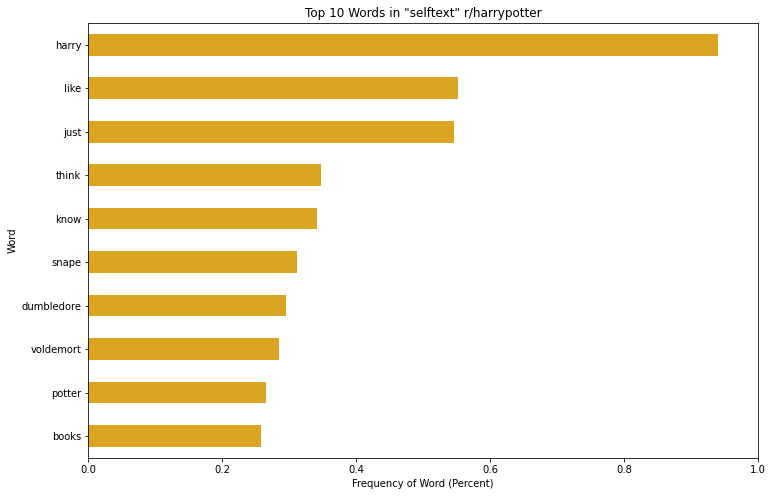

In [348]:
ax = hp_common_words_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Words in "selftext" r/harrypotter',
    ylabel='Frequency of Word (Percent)',
    xlabel='Word',
    xlim=[0, 1.0],
    color='goldenrod'
)
ax.set_xlabel('Frequency of Word (Percent)')
plt.savefig('../images/hp_selftext_words');

In [275]:
marvel_common_words = marvel_common.drop(columns=['subreddit']).sum().sort_values(ascending=True).tail(10)
marvel_common_words

amp        790
https      823
think      870
know       955
comics    1011
spider    1497
just      1619
like      1716
man       1793
marvel    1815
dtype: int64

In [276]:
marvel_common_words_df = pd.DataFrame(marvel_common_words, columns=['word_count'])
marvel_common_words_df

,word_count
amp,790
https,823
think,870
know,955
comics,1011
spider,1497
just,1619
like,1716
man,1793
marvel,1815


In [277]:
marvel_common_words_df['percent'] = marvel_common_words_df['word_count'] / 3491

In [278]:
marvel_common_words_df

,word_count,percent
amp,790,0.226296
https,823,0.235749
think,870,0.249212
know,955,0.273561
comics,1011,0.289602
spider,1497,0.428817
just,1619,0.463764
like,1716,0.491550
man,1793,0.513606
marvel,1815,0.519908


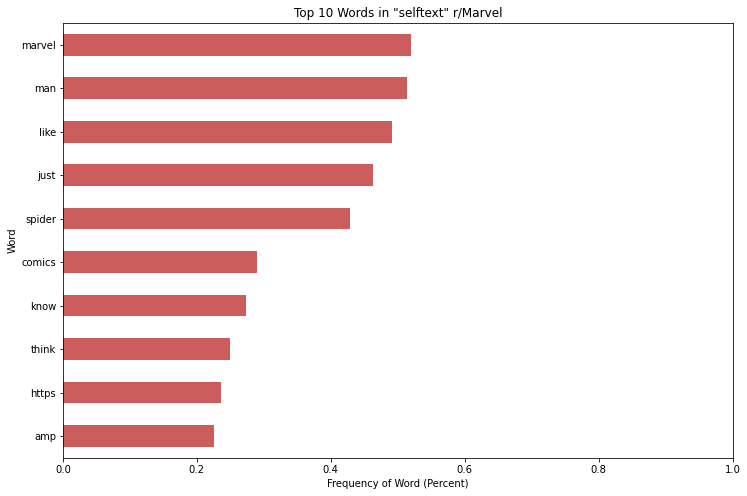

In [349]:
ax = marvel_common_words_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Words in "selftext" r/Marvel',
    ylabel='Frequency of Word (Percent)',
    xlabel='Word',
    xlim=[0, 1.0],
    color='indianred'
)
ax.set_xlabel('Frequency of Word (Percent)')
plt.savefig('../images/marvel_selftext_words');

#### Getting the Most Common Words in 'title' Per Subreddit

In [299]:
cv2 = CountVectorizer(stop_words='english', strip_accents='ascii', min_df=2)
cv2.fit(subreddit['title'])
vect_status = cv2.transform(subreddit['title'])
status_df_2 = pd.DataFrame(vect_status.A, columns=cv2.get_feature_names_out())

common_words_2 = status_df.sum().sort_values(ascending=False).head(15)
common_words_2

harry         5786
like          5086
just          4953
know          3042
think         2996
time          2155
man           2095
really        2027
people        1914
snape         1906
marvel        1826
dumbledore    1803
did           1748
voldemort     1738
amp           1726
dtype: int64

In [301]:
status_df_2.drop(columns='subreddit', inplace=True)

In [302]:
title_common_words_subreddit = pd.concat([status_df_2, subreddit['subreddit']], axis=1)
title_common_words_subreddit

,00,000,01,10,100,1000,11,12,13,14,...,youre,youth,youtube,youve,yule,zarathos,zdarsky,zodiac,zombies,subreddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter
9596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter
9597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter
9598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter


In [304]:
title_common_words_subreddit['subreddit'].value_counts()

harrypotter    6109
Marvel         3491
Name: subreddit, dtype: int64

##### Filtering the words by subreddit

In [305]:
hp_common_title = title_common_words_subreddit[title_common_words_subreddit['subreddit']=='harrypotter']

In [306]:
marvel_common_title = title_common_words_subreddit[title_common_words_subreddit['subreddit']=='Marvel']

In [307]:
hp_common_title.drop(columns=['subreddit'], inplace=True)

C:\Users\jacki\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [311]:
hp_common_title_words = hp_common_title.sum().sort_values().tail(10)
hp_common_title_words

snape          264
just           266
think          271
books          284
did            292
dumbledore     302
voldemort      308
hogwarts       312
potter         590
harry         1063
dtype: int64

In [312]:
hp_common_title_words_df = pd.DataFrame(hp_common_title_words, columns=['word_count'])
hp_common_title_words_df

,word_count
snape,264
just,266
think,271
books,284
did,292
dumbledore,302
voldemort,308
hogwarts,312
potter,590
harry,1063


##### Adding a Percent column to better compare the r/Marvel and r/harrypotter words

In [313]:
hp_common_title_words_df['percent'] = hp_common_title_words_df['word_count'] / 6109

In [314]:
hp_common_title_words_df

,word_count,percent
snape,264,0.043215
just,266,0.043542
think,271,0.044361
books,284,0.046489
did,292,0.047798
dumbledore,302,0.049435
voldemort,308,0.050417
hogwarts,312,0.051072
potter,590,0.096579
harry,1063,0.174006


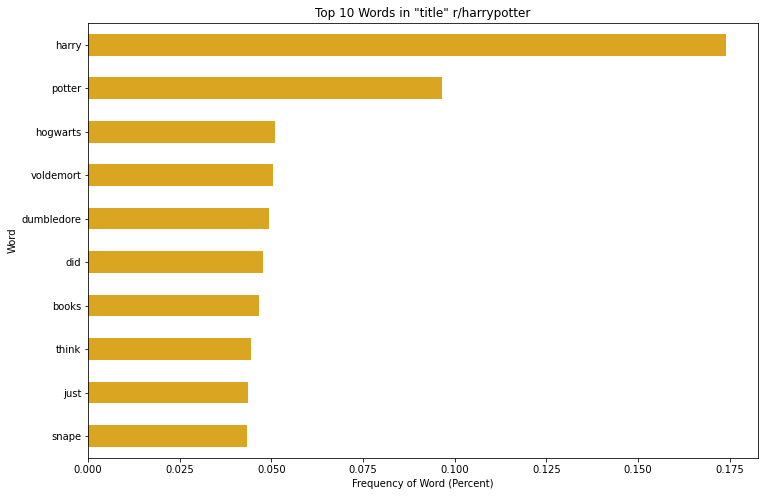

In [350]:
ax = hp_common_title_words_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Words in "title" r/harrypotter',
    ylabel='Frequency of Word (Percent)',
    xlabel='Word',
    color='goldenrod'
)
ax.set_xlabel('Frequency of Word (Percent)')
plt.savefig('../images/hp_title_words');

In [318]:
marvel_common_title_words = marvel_common_title.drop(columns=['subreddit']).sum().sort_values(ascending=True).tail(10)
marvel_common_title_words

way         126
moon        132
knight      134
question    161
comic       162
spider      231
mcu         233
comics      266
man         281
marvel      587
dtype: int64

In [319]:
marvel_common_title_words_df = pd.DataFrame(marvel_common_title_words, columns=['word_count'])
marvel_common_title_words_df

,word_count
way,126
moon,132
knight,134
question,161
comic,162
spider,231
mcu,233
comics,266
man,281
marvel,587


In [321]:
marvel_common_title_words_df['percent'] = marvel_common_title_words_df['word_count'] / 3491

In [322]:
marvel_common_title_words_df

,word_count,percent
way,126,0.036093
moon,132,0.037812
knight,134,0.038384
question,161,0.046119
comic,162,0.046405
spider,231,0.066170
mcu,233,0.066743
comics,266,0.076196
man,281,0.080493
marvel,587,0.168147


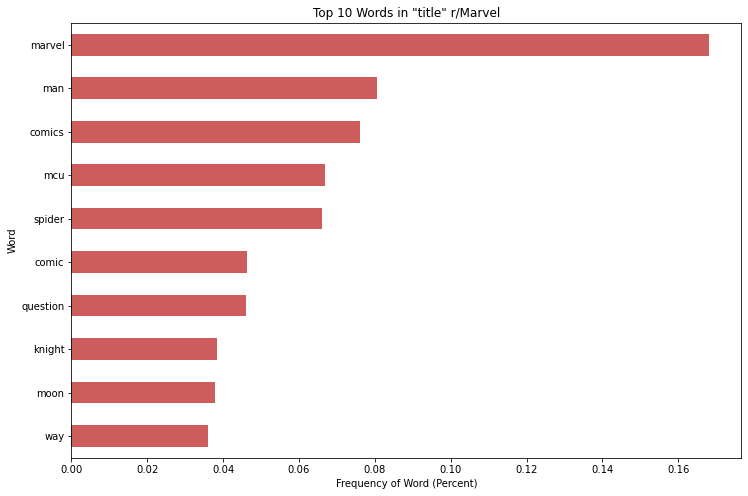

In [351]:
ax = marvel_common_title_words_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Words in "title" r/Marvel',
    ylabel='Frequency of Word (Percent)',
    xlabel='Word',
    color='indianred'
)
ax.set_xlabel('Frequency of Word (Percent)')
plt.savefig('../images/marvel_title_words');